# Building CNN Convolution Neural Network

### Project Fashion Classification - End to End 

Train Convolution Neural Network on 60,000 Fashion Mnist Images(data in NP array) \
Test Convolution Neural Network on 10,000 Fashion-MNIST images(data in NP array)

### Images Labels
* 0 - T-shirt/top
* 1 - Trouser
* 2 - Pullover
* 3 - Dress
* 4 - Coat 
* 5 - Sandal
* 6 - Shirt
* 7 - Sneaker
* 8 - Bag
* 9 - Ankle Boot

### Import Libraries

In [4]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import keras

### Load Data

In [5]:
(X_train,y_train),(X_test,y_test) =keras.datasets.fashion_mnist.load_data()

In [6]:
X_train.shape ,y_train.shape

((60000, 28, 28), (60000,))

In [7]:
X_test.shape,y_test.shape

((10000, 28, 28), (10000,))

In [8]:
# Access the information of Single Image
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [9]:
# to check the image label
y_train[0]

9

### Show Image

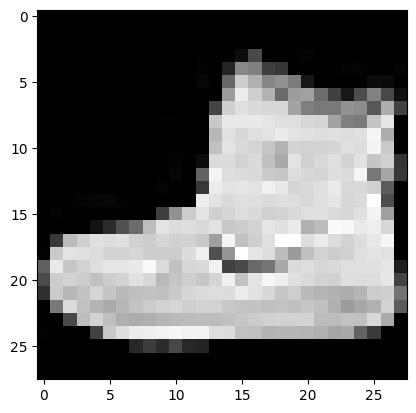

In [10]:
plt.imshow(X_train[0],cmap='grey')

In [11]:
class_labels = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle Boot"]

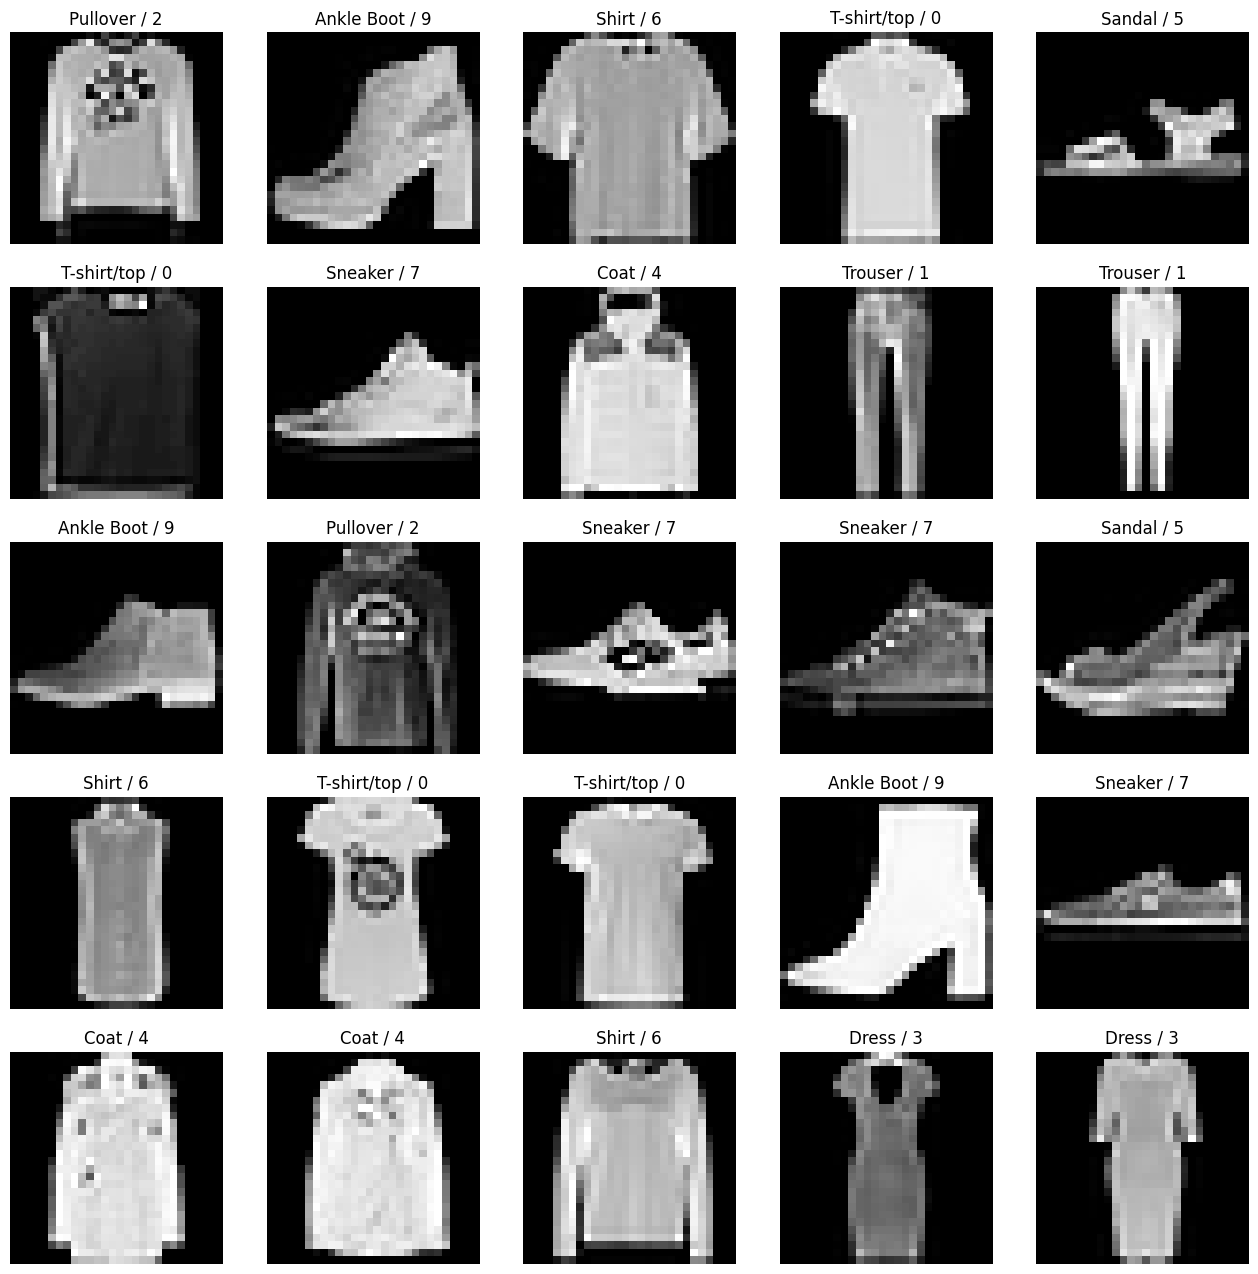

In [12]:
plt.figure(figsize=(16,16))
j = 1
for i in np.random.randint(0,1000,25):
    plt.subplot(5,5,j);j+=1;
    plt.imshow(X_train[i],cmap="grey")
    plt.axis("off")
    plt.title('{} / {}'.format(class_labels[y_train[i]], y_train[i]))

### Change Dimension

In [13]:
X_train.ndim

3

In [14]:
X_train=np.expand_dims(X_train,-1)
X_test=np.expand_dims(X_test,-1)

### Feature Scaling

In [15]:
X_train = X_train/255
X_test = X_test/255


### Split Datasets

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.2,random_state=2020)

### Convolution Neural Network- Model Building

In [17]:
model =  keras.models.Sequential([
    keras.layers.Conv2D(filters=32,kernel_size=3,strides=(1,1),padding='valid',activation='relu',input_shape=[28,28,1]),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128,activation='relu'),
    keras.layers.Dense(units=10,activation='softmax')
])

d:\Python Projects\ML Projects\iqraenv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       692,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 693,962 (2.65 MB)

 Trainable params: 693,962 (2.65 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [20]:
model.fit(X_train,y_train,epochs=10,batch_size=512,verbose=1,validation_data=(X_val,y_val))

Epoch 1/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 10s 85ms/step - accuracy: 0.6697 - loss: 0.9538 - val_accuracy: 0.8432 - val_loss: 0.4506
Epoch 2/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 8s 87ms/step - accuracy: 0.8545 - loss: 0.4212 - val_accuracy: 0.8645 - val_loss: 0.3939
Epoch 3/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 10s 106ms/step - accuracy: 0.8707 - loss: 0.3699 - val_accuracy: 0.8736 - val_loss: 0.3598
Epoch 4/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 9s 96ms/step - accuracy: 0.8790 - loss: 0.3417 - val_accuracy: 0.8819 - val_loss: 0.3455
Epoch 5/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 9s 89ms/step - accuracy: 0.8870 - loss: 0.3201 - val_accuracy: 0.8849 - val_loss: 0.3297
Epoch 6/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 8s 88ms/step - accuracy: 0.8965 - loss: 0.2965 - val_accuracy: 0.8878 - val_loss: 0.3163
Epoch 7/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 8s 88ms/step - accuracy: 0.9016 - loss: 0.2823 - val_accuracy: 0.8939 - val_loss: 0.3040
Epoch 8/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 9s 92ms/step - accuracy: 0.9055 - loss: 0.2684 - val_accuracy: 0.8934 

### Test the Model

In [21]:
model.predict(np.expand_dims(X_test[0],axis=0)).round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.98]],
      dtype=float32)

In [22]:
np.argmax(model.predict(np.expand_dims(X_test[0],axis=0)).round(2))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


9

In [23]:
y_test[0]

9

In [24]:
y_pred =model.predict(X_test).round(2)
y_pred

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


array([[0.  , 0.  , 0.  , ..., 0.01, 0.  , 0.98],
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.01, 0.  , 0.  , ..., 0.  , 0.96, 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.07, 0.02, 0.  ]], dtype=float32)

In [25]:
model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8901 - loss: 0.2997


[0.29645976424217224, 0.8896999955177307]

### Visualize output

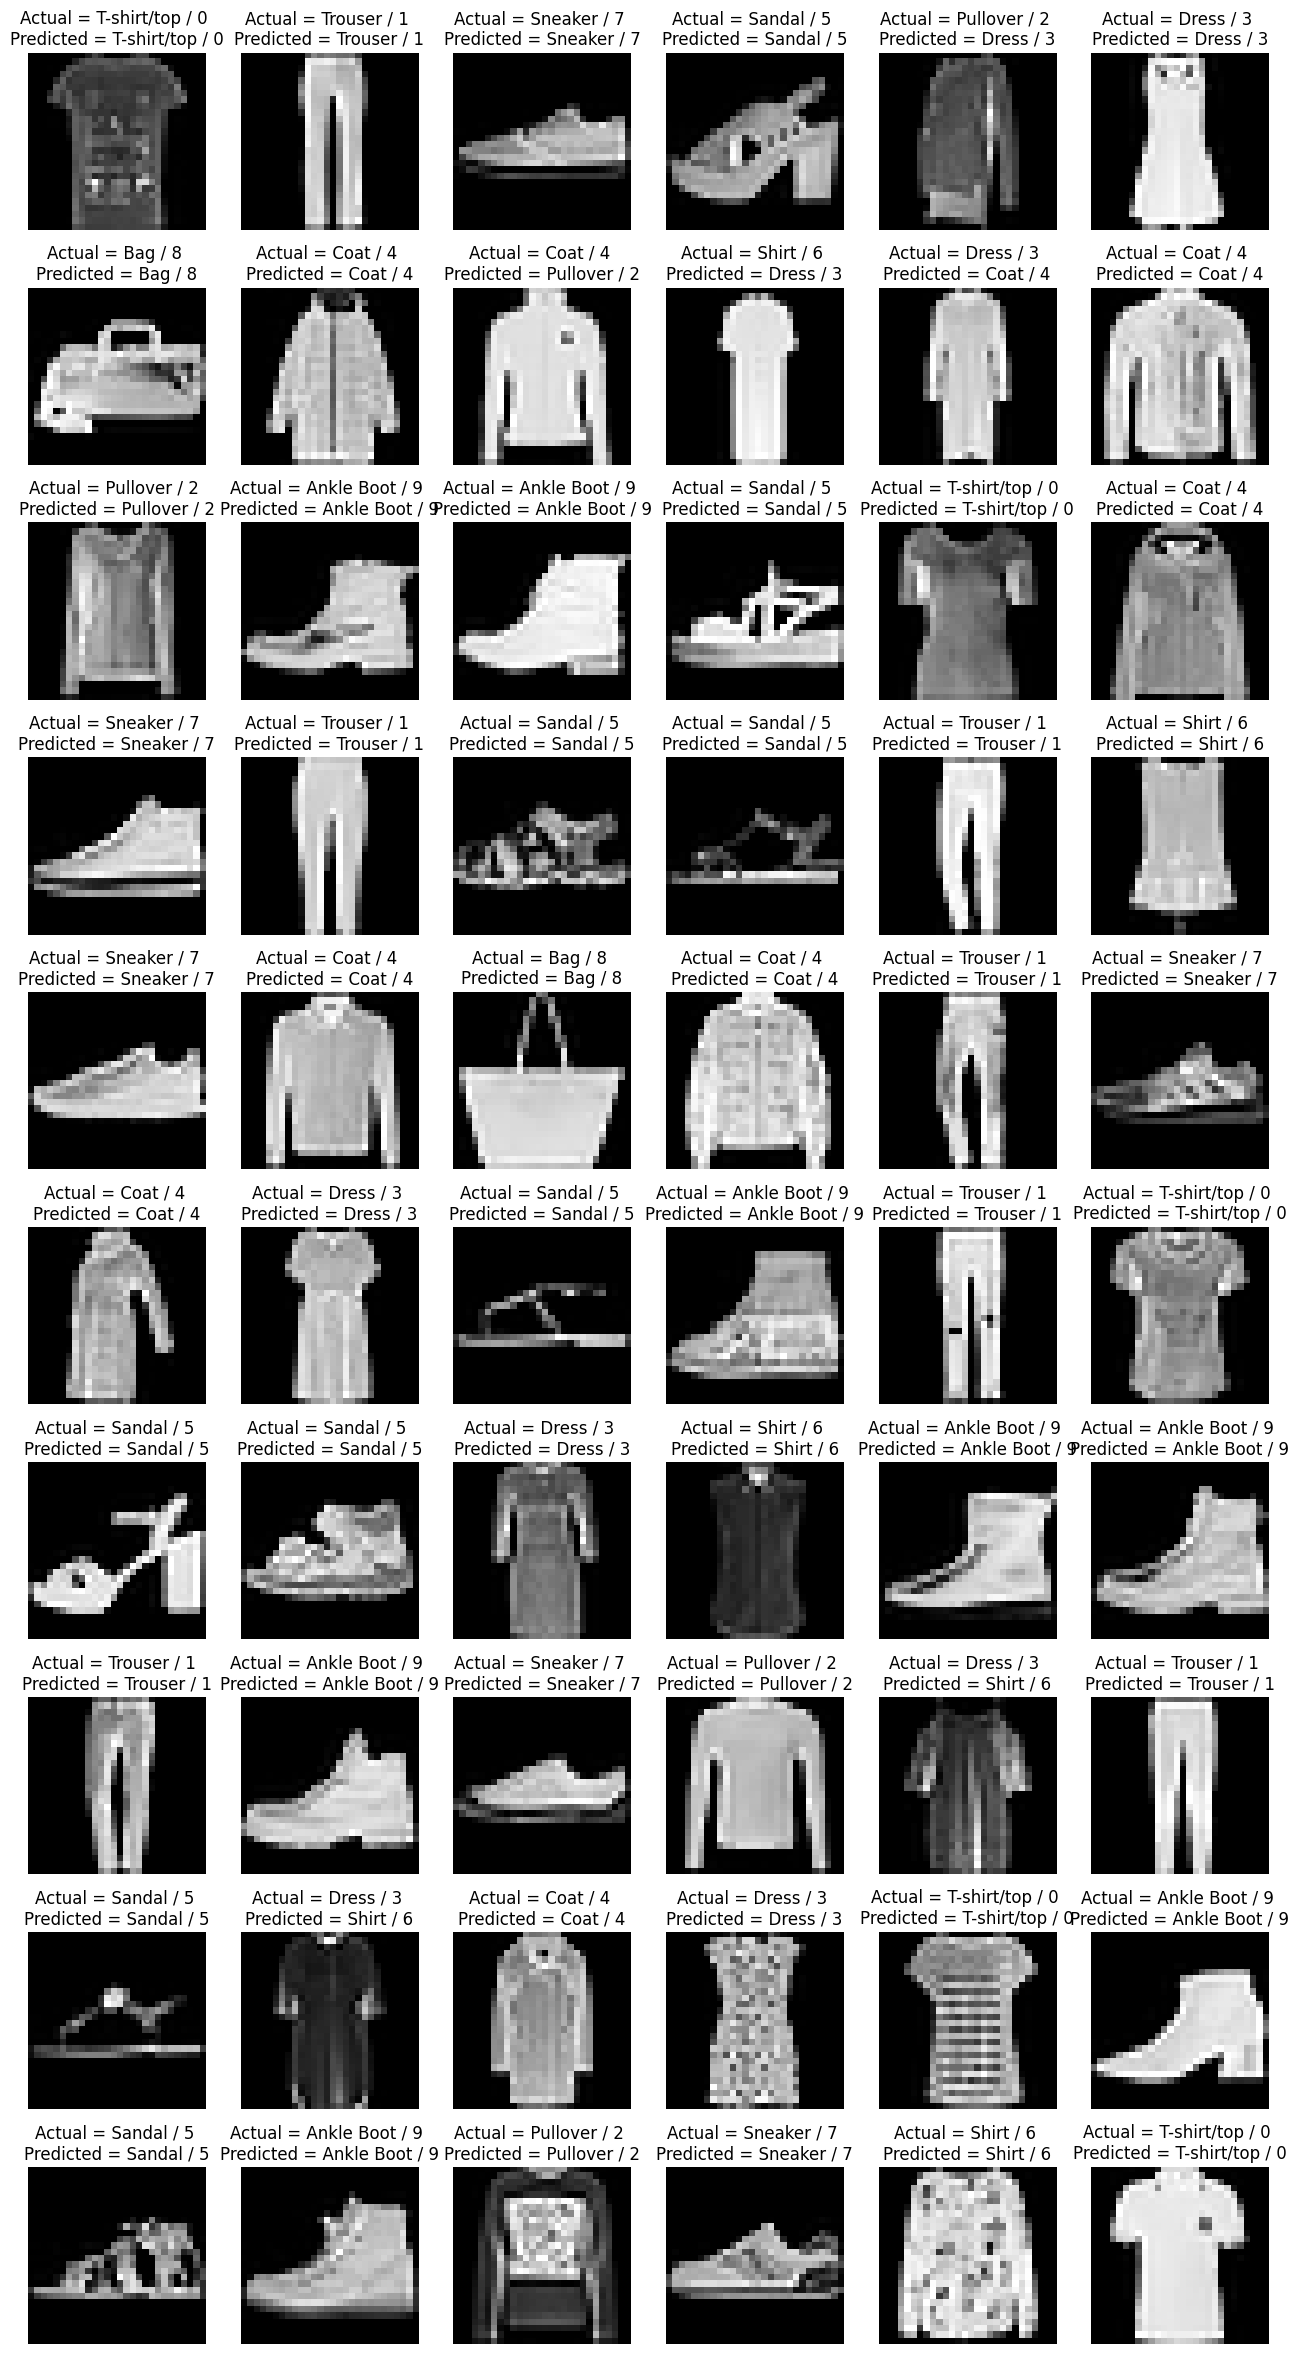

In [26]:
plt.figure(figsize=(16,30))
j = 1
for i in np.random.randint(0,1000,60):
    plt.subplot(10,6,j);j+=1;
    plt.imshow(X_test[i].reshape(28,28),cmap="grey")
    plt.title('Actual = {} / {} \nPredicted = {} / {}'.format(class_labels[y_test[i]], y_test[i], class_labels[np.argmax(y_pred[i])],np.argmax(y_pred[i])))
    plt.axis("off")

### Confusion Matrix

<Axes: >

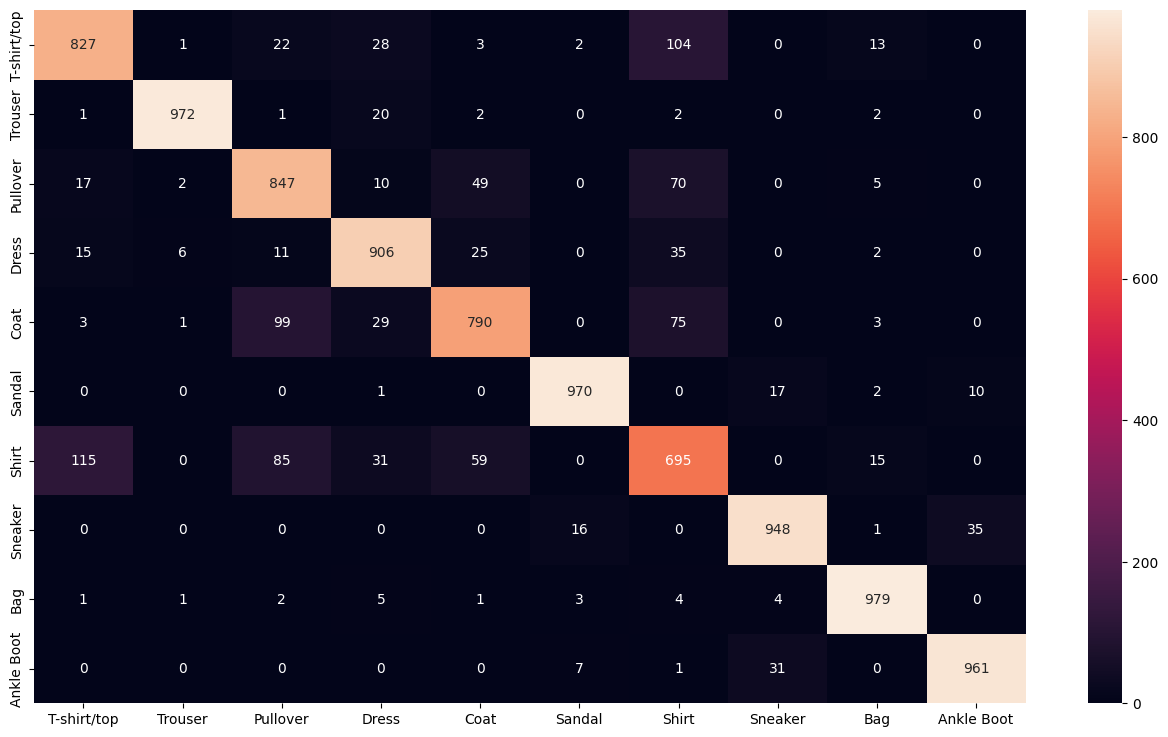

In [27]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(16,9))
y_pred_labels = [np.argmax(label) for label in y_pred ]
cm = confusion_matrix(y_test,y_pred_labels)

#show cm
sns.heatmap(cm,annot=True,fmt = 'd',xticklabels=class_labels,yticklabels=class_labels)

### Classification Report

In [28]:
# Precision = TP /(TP+FP)
# Recall = TP / (TP+FN)
from sklearn.metrics import classification_report
cr = classification_report(y_test,y_pred_labels,target_names=class_labels)
print(cr)

              precision    recall  f1-score   support

 T-shirt/top       0.84      0.83      0.84      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.79      0.85      0.82      1000
       Dress       0.88      0.91      0.89      1000
        Coat       0.85      0.79      0.82      1000
      Sandal       0.97      0.97      0.97      1000
       Shirt       0.70      0.69      0.70      1000
     Sneaker       0.95      0.95      0.95      1000
         Bag       0.96      0.98      0.97      1000
  Ankle Boot       0.96      0.96      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



### Save Model

In [29]:
model.save('fashion_Classification_CNN_Model.h5')

### Convolution Neural Network-Building Complex Model

In [39]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32,kernel_size=3,strides=(1,1),padding='valid',activation='relu',input_shape=[28,28,1]),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Conv2D(filters=64,kernel_size=3,strides=(2,2),padding='same',activation='relu',input_shape=[28,28,1]),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128,activation='relu'),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(units=256,activation='relu'),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(units=128,activation='relu'),
    keras.layers.Dense(units=10,activation='softmax'),

])

d:\Python Projects\ML Projects\iqraenv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [40]:
#compile the model
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])


In [43]:
# Train the model
model.fit(X_train,y_train,epochs=40,batch_size=512,verbose=1,validation_data=(X_val,y_val))

Epoch 1/40
94/94 ━━━━━━━━━━━━━━━━━━━━ 8s 90ms/step - accuracy: 0.9258 - loss: 0.2016 - val_accuracy: 0.9066 - val_loss: 0.2707
Epoch 2/40
94/94 ━━━━━━━━━━━━━━━━━━━━ 9s 92ms/step - accuracy: 0.9281 - loss: 0.1938 - val_accuracy: 0.9077 - val_loss: 0.2647
Epoch 3/40
94/94 ━━━━━━━━━━━━━━━━━━━━ 8s 86ms/step - accuracy: 0.9333 - loss: 0.1812 - val_accuracy: 0.9032 - val_loss: 0.2739
Epoch 4/40
94/94 ━━━━━━━━━━━━━━━━━━━━ 8s 85ms/step - accuracy: 0.9346 - loss: 0.1766 - val_accuracy: 0.9110 - val_loss: 0.2606
Epoch 5/40
94/94 ━━━━━━━━━━━━━━━━━━━━ 8s 82ms/step - accuracy: 0.9349 - loss: 0.1765 - val_accuracy: 0.9087 - val_loss: 0.2726
Epoch 6/40
94/94 ━━━━━━━━━━━━━━━━━━━━ 8s 83ms/step - accuracy: 0.9366 - loss: 0.1719 - val_accuracy: 0.9083 - val_loss: 0.2677
Epoch 7/40
94/94 ━━━━━━━━━━━━━━━━━━━━ 8s 84ms/step - accuracy: 0.9385 - loss: 0.1647 - val_accuracy: 0.9102 - val_loss: 0.2692
Epoch 8/40
94/94 ━━━━━━━━━━━━━━━━━━━━ 8s 83ms/step - accuracy: 0.9406 - loss: 0.1571 - val_accuracy: 0.9094 - v

In [44]:
model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9070 - loss: 0.3990


[0.3919573724269867, 0.9065999984741211]